In [1]:
import math

import openpyxl as opxl
from openpyxl.utils.dataframe import dataframe_to_rows
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import wave_func as wf

In [2]:
# V4.45
r_V445 = 13.8*1E-3
lambda_V445 = 22.5*1E-3
dp_he_V445 = 9.6*1E-3

Heta = 0.022
d_p_he = dp_he_V445 # distance du panneau au max de l'échangeur

# e_he_tot = 0.022 # input de l' "épaisseur" totale de l'échangeur, max de la courbe sup au min de la courbe inf
delta = 0.0037 # épaisseur vraie du MPE
# e_he = e_he_tot-delta #épaisseur de la courbe sup échangeur
lambd = lambda_V445 # lambda > 2*e_he

# r = wf.radius(e_he,lambd)
r = r_V445
# r_input = 0.0138
e_he = wf.e_he(r,lambd)

#r = r_input

wave = [e_he,lambd,r]

omega2 = wf.omega2(wave)

print(r-e_he/2)
print(wave)
test = 2*r - math.sqrt(4*r**2-(lambd**2)/4)
print(test)


0.012601562403130814
[0.002396875193738376, 0.0225, 0.013800000000000002]
0.0023968751937383723


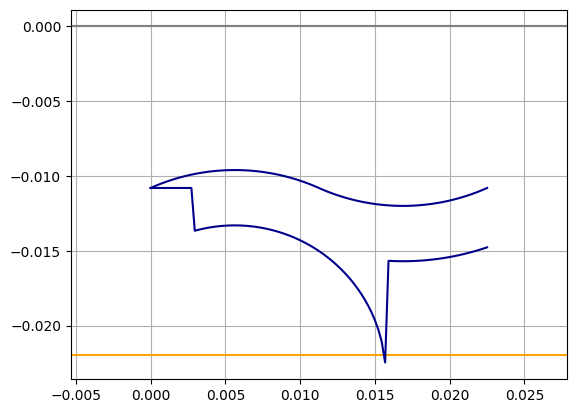

In [3]:
interval = np.linspace(-lambd/4,3*lambd/4,100)
interval2 = np.linspace(0,lambd,100)
y = []
yP = []

default = math.sqrt(r**2-interval[0]**2) - r - d_p_he

for i in range(len(interval)):
    x = interval[i]
    if x<=lambd/4:
        to_add = math.sqrt(r**2-x**2) - r - d_p_he
        if x<=lambd/8-lambd/4:
            to_add_p = default
        elif (r-delta)**2-x**2 >0:
            to_add_p = math.sqrt((r-delta)**2-x**2) - r - d_p_he
        elif x>=0.012-lambd/4:
            to_add_p = omega2[1] - math.sqrt((r+delta)**2-(x-omega2[0])**2) - r - d_p_he

        else:
            to_add_p = omega2[1] - math.sqrt((r+delta)**2-(x-omega2[0])**2) - r - d_p_he
    else:
        to_add = omega2[1] - math.sqrt(r**2-(x-omega2[0])**2) - r - d_p_he
        if (r-delta)**2-x**2 >0:
            to_add_p = math.sqrt((r-delta)**2-x**2) - r - d_p_he
        else:
            to_add_p = omega2[1] - math.sqrt((r+delta)**2-(x-omega2[0])**2) - r - d_p_he


    y.append(to_add)
    yP.append(to_add_p)

# for i in range(1,len(interval)-1):
#     x1 = interval[i-1]
#     x2 = interval[i+1]
#     y1 = y[i-1]
#     y2 = y[i+1]
#     m = (y2-y1)/(x2-x1)
    
#     xM = (x1+x2)/2
#     yM = (y1+y2)/2
#     b=m*xM+yM

#     coeff = [m**2+1,2*(yM-b)*m-2*xM,(yM-b)**2+xM**2-delta**2]
#     racines = np.roots(coeff)
#     yPr = [-m*racines[0]+b,-m*racines[1]+b]
#     yP = max(yPr)
#     xP = (b-yP)/m

#     xP_list.append(xP)
#     yP_list.append(yP)

plt.axhline(y=0,color='gray')
plt.axhline(y=-Heta,color='orange')
plt.plot(interval2,y,color='darkblue')
plt.plot(interval2,yP,color='darkblue')
# plt.plot(xP_list,yP_list,color='darkblue')

axes = plt.gca()
# axes.set_xlim(-0.5,0.03)
plt.axis('equal')

plt.grid()
plt.show()

In [7]:
l = 1.035 #longueur totale
nb_period = l/lambd
print('nb_period = ', nb_period)

theta = 2*math.acos(1-(e_he/(2*r)))
print('theta =', theta)
print('2pi =', 2*math.pi)

L = 2*theta*r*nb_period
print('L = ',L)

nb_period =  46.0
theta = 0.8396676078966825
2pi = 6.283185307179586
L =  1.0660419949856283


In [5]:
print('e_he =',e_he)
print('lambd =', lambd)
print('r = ',r)


e_he = 0.002396875193738376
lambd = 0.0225
r =  0.013800000000000002
